**# Second Model (Convolutional filters with ML)** 

---



---



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import cv2
import pickle

from keras.models import Sequential
from keras.layers import Conv2D
import os

In [ ]:

#print(os.listdir("images/"))
SIZE = 512 #Resize images

train_images = []

for directory_path in glob.glob("/content/drive/MyDrive/simages"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
        
train_images = np.array(train_images)


In [ ]:
train_masks = [] 
for directory_path in glob.glob("/content/drive/MyDrive/slabels"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE, SIZE))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)
        
train_masks = np.array(train_masks)


<function matplotlib.pyplot.show>

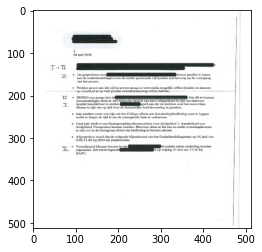

In [ ]:
# print out images of each array to make sure they match
import cv2
from matplotlib import pyplot as plt

plt.imshow(train_images[20])
plt.show

<function matplotlib.pyplot.show>

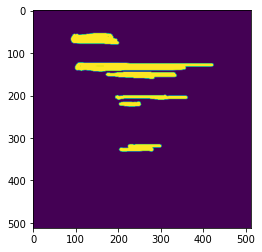

In [ ]:
plt.imshow(train_masks[20])
plt.show

In [ ]:
X_train = train_images
y_train = train_masks
y_train = np.expand_dims(y_train, axis=3)

In [ ]:
#Building the feature extractors
activation = 'sigmoid'
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))

#feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(BatchNormalization())
#
#feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(BatchNormalization())
#feature_extractor.add(MaxPooling2D())
#feature_extractor.add(Flatten())


In [ ]:

X = feature_extractor.predict(X_train)

X = X.reshape(-1, X.shape[3])

Y = y_train.reshape(-1)


In [ ]:
dataset = pd.DataFrame(X)
dataset['Label'] = Y
print(dataset['Label'].unique())
print(dataset['Label'].value_counts())

[  0  34 210 252 246 167 249 255 150  10 143 250 187  35   8  98 240 218
 182  71  90 178 194 226 248 157 119 227  43  13 251 138 197  24  54 176
  53  23  46 117 104 114 201 236 242 229  18 195 235  80 101 186 221   5
   4 253 223  22 146  38 244 156  86 206 173 233 199  12  50 205 234  44
  40   3 170  82 217 103 228 230 222 243 232  58  32 231  29  21  88 116
  77 213 142  94 237 108 238 254  56  81 125 193 174  57  14 200  64  49
 202 158 159 204 190  73 241   7 225 224  52 106 168 122 163 183  66 141
   1  83 160 247  17 140 165 149 184 109  20  84  61 161 211  76  16 111
 245  68 192 100  11  62 239  42 115 188 215 220   2   6 126 162  45 169
  51 179 129  36  19  39  60 105 196 212 180   9 113  79 134 175 198 127
 177  47 155  26 171 124  31 120 130 144  95  87 151 139  25 132 136 207
  63  55  37  93  78  70 164  33  89  48 133 219 191  85 107 137  27 135
  75  96 203  99 209  15  65 185 121  67  28 145 189 153  92 131 208  30
 118  74 152  72 154 172  59 181 123  91 128 216  4

In [ ]:
##If we do not want to include pixels with value 0 
##e.g. Sometimes unlabeled pixels may be given a value 0.
dataset = dataset[dataset['Label'] != 0]

X_for_RF = dataset.drop(labels = ['Label'], axis=1)
Y_for_RF = dataset['Label']

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
#n_estimators = 50 , random_state = 42
model = RandomForestClassifier(n_estimators = 10, random_state = 10)



In [ ]:
# Train the model on training data
# Ravel Y to pass 1d array instead of column vector
model.fit(X_for_RF, Y_for_RF) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=10, random_state=10)

In [ ]:
#NB
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_for_RF, Y_for_RF)


GaussianNB()

In [ ]:
#LR
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_for_RF, Y_for_RF)

In [ ]:
#to save the model and load it later..
#filename = 'RF_model.sav'
#pickle.dump(model, open(filename, 'wb'))

#loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/content/drive/MyDrive/16.png', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (SIZE, SIZE))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)


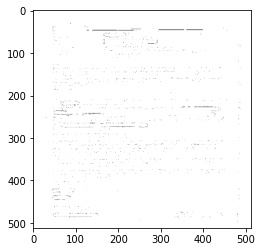

In [ ]:
#predict_image = np.expand_dims(X_train[8,:,:,:], axis=0)
X_test_feature = feature_extractor.predict(test_img)
X_test_feature = X_test_feature.reshape(-1, X_test_feature.shape[3])

prediction = model.predict(X_test_feature)

prediction_image = prediction.reshape(mask.shape)
#plt.imshow(prediction_image)
plt.imshow(prediction_image, cmap='gray')


